# WEEK 6
# PIMA Indians Diabetes Database

# **METADATA**
---
Pregnancies : Number of times pregnant <br>
Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
BloodPressure : Diastolic blood pressure (mm Hg) <br>
SkinThickness : Triceps skin fold thickness (mm) <br>
Insulin : 2-Hour serum insulin (mu U/ml) <br>
BMI : Body mass index (weight in kg/(height in m)^2) <br>
DiabetesPedigreeFunction : Diabetes pedigree function <br>
Age : Age (years) <br>
Outcome : Class variable (0 or 1) 1 is diabetes and 0 is not diabetes <br>

## Import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/diabetes.csv')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
63,2,141,58,34,128,25.4,0.699,24,0
174,2,75,64,24,55,29.7,0.370,33,0
341,1,95,74,21,73,25.9,0.673,36,0
343,5,122,86,0,0,34.7,0.290,33,0
329,6,105,70,32,68,30.8,0.122,37,0
648,11,136,84,35,130,28.3,0.260,42,1
267,2,128,64,42,0,40.0,1.101,24,0
548,1,164,82,43,67,32.8,0.341,50,0
229,0,117,80,31,53,45.2,0.089,24,0
472,0,119,66,27,0,38.8,0.259,22,0


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [91]:
df.info()
# info() digunakan untuk menunjukkan berapa jumlah data pada dataset serta data typenya dan juga jumlah non-null pada tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3. Show describe column and conclude what the insight is from that column

In [92]:
df.describe()
# describe digunakan untuk menunjukkan percentile, min, max dan jumlah data
# Data terdiri dari 768 observasi yang mencakup variabel seperti jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, insulin, indeks massa tubuh (BMI), fungsi silsilah diabetes, usia, dan status diabetes (Outcome).

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Checking null value in the column

In [93]:
df.isnull().sum()
# isnull().sum() digunakan untuk menunjukkan data yang kosong (null), dan pada dataset ini tidak ada data yang null

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Visualisation

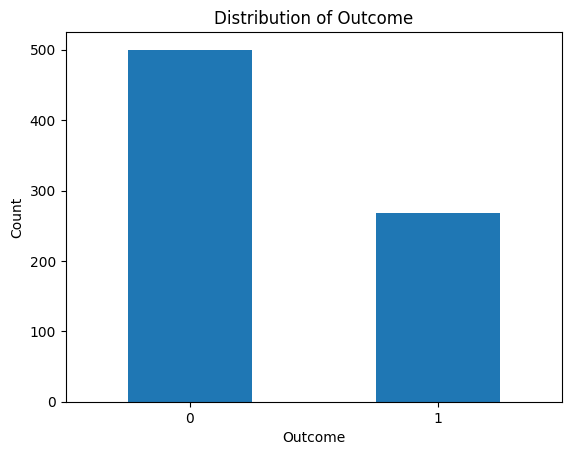

In [94]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Dari grafik yang ditampilkan, pada dataset ini lebih banyak orang yang tidak terkena diabetes daripada orang yang terkena diabetes

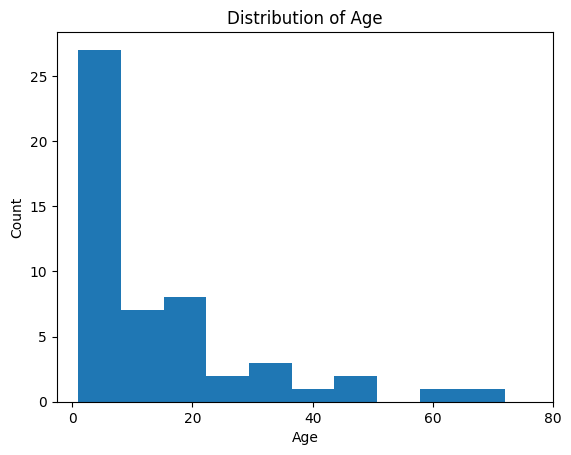

In [95]:
df['Age'].value_counts().plot(kind='hist')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([0, 20, 40, 60, 80])
plt.show()
# dari grafik, kita dapat mengetahui bahwa rentang umur yang paling banyak datanya adalah 0-20 tahun

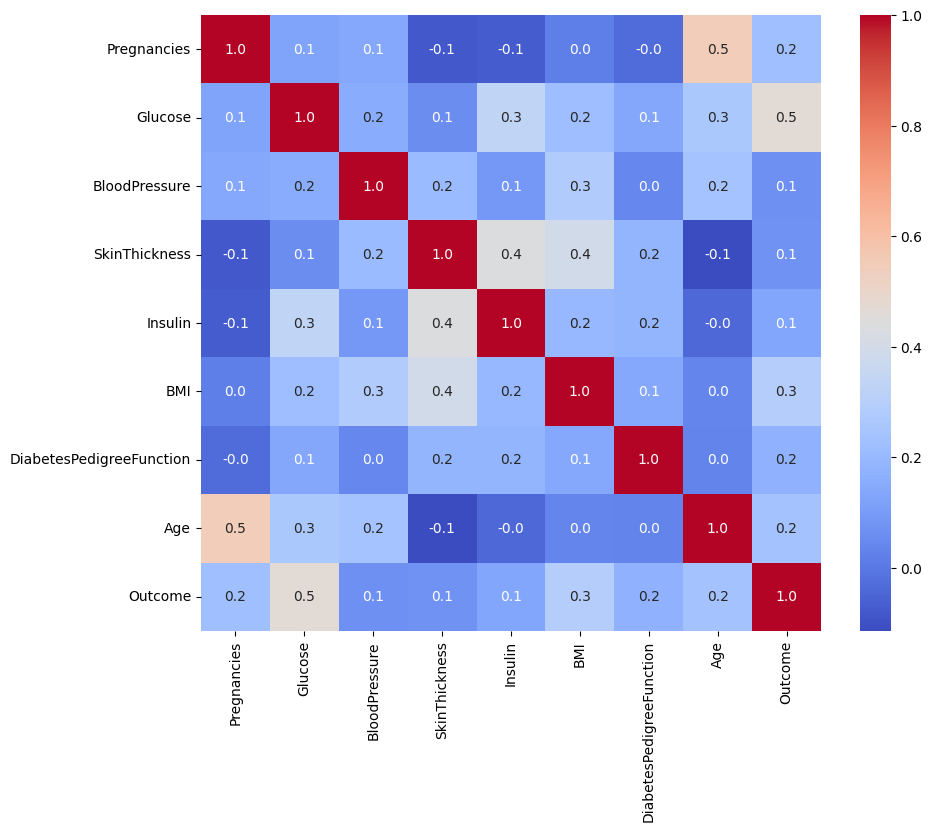

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt='0.1f')
plt.show()
# berdasarkan heatmap ini age dan pregancies memiliki korelasi yang cukup kuat, begitu juga dengan glucose dan outcome

## Machine Learning

1. Splitting X and y

In [97]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# y merupakan data yang menjadi target, dan X merupakan variabel-variabel yang akan mempengaruhi hasil dari y

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# memisah data menjadi train dan test, train memiliki 80% data dan test sisanya, lalu random state yang dipakai adalah 42

In [99]:
X_train.shape,X_test.shape
# memeriksa dimensi train data dan test data, memastikan bahwa pembagian data sudah sesuai dan data memiliki jumlah fitur yang sama.

((614, 8), (154, 8))

## Desicion Tree

In [100]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
dt_entropy.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria entropy, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [101]:
y_pred_entropy = dt_entropy.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_entropy) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy

In [102]:
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_entropy)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_entropy

Model accuracy score with criterion entropy: 0.7662337662337663


In [103]:
print("Training set score (Entropy): ", dt_entropy.score(X_train, y_train))
print("Test set score (Entropy): ", dt_entropy.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_entropy

Training set score (Entropy):  0.7752442996742671
Test set score (Entropy):  0.7662337662337663


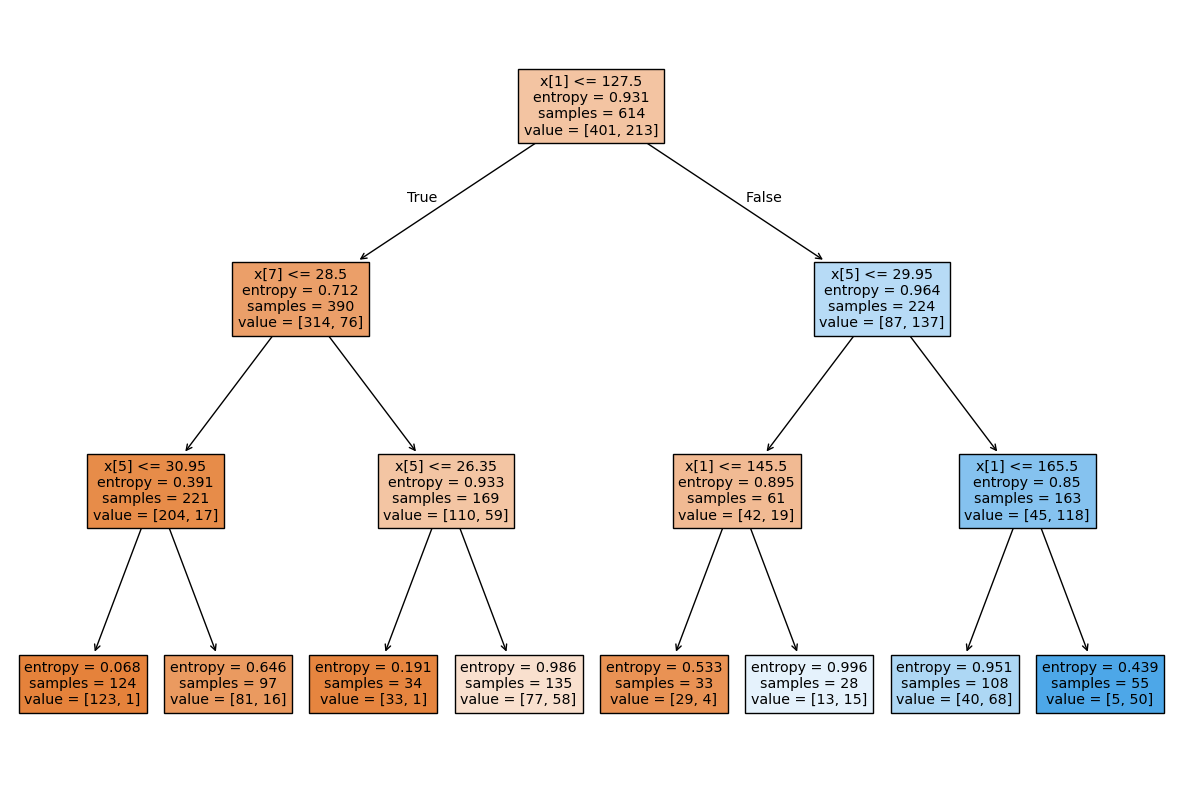

In [104]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_entropy dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [105]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_gini.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria Gini Index, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train

DecisionTreeClassifier(max_depth=3, random_state=0)

In [106]:
y_pred_gini = dt_gini.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_gini) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_gini

In [107]:
print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_gini

Model accuracy score with criterion gini index: 0.7597402597402597


In [108]:
print("Training set score (Gini Index): ", dt_gini.score(X_train, y_train))
print("Test set score (Gini Index): ", dt_gini.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_gini

Training set score (Gini Index):  0.7768729641693811
Test set score (Gini Index):  0.7597402597402597


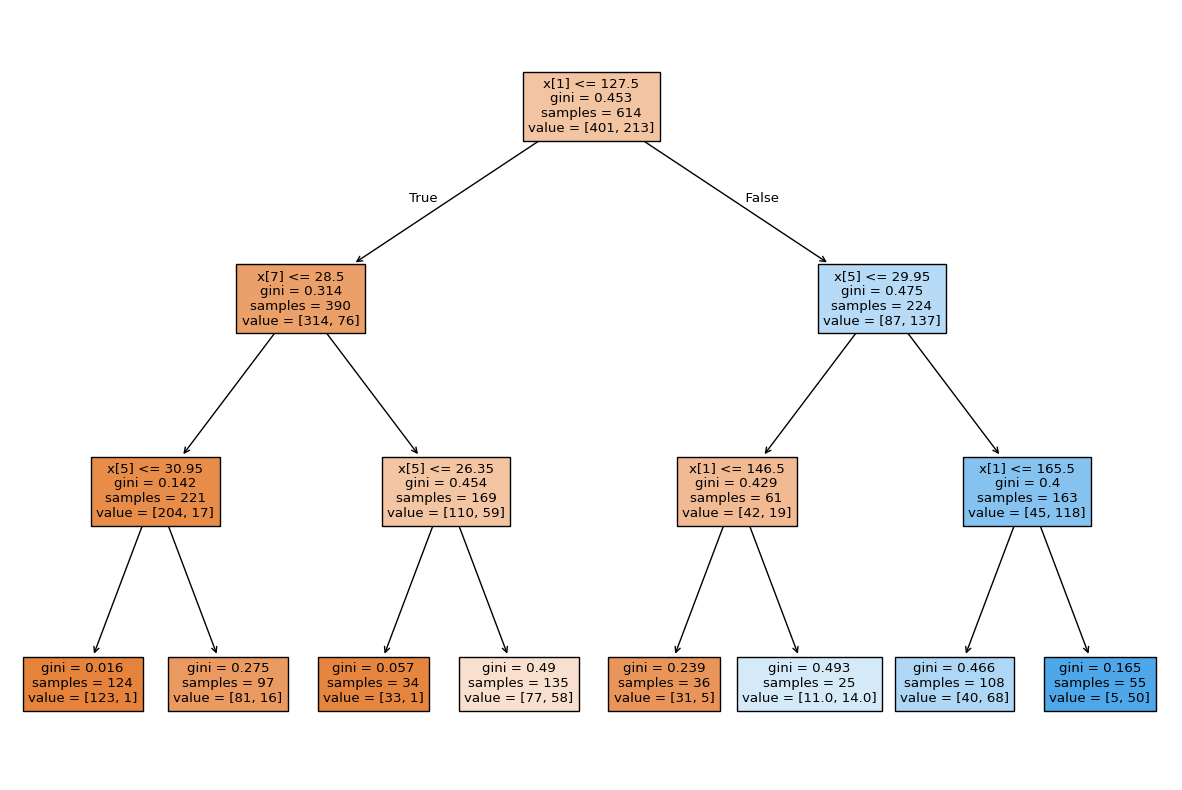

In [109]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_gini dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [110]:
print("Confusion Matrix Entropy\n",confusion_matrix(y_test, y_pred_entropy))
print("Confusion Matrix Gini Index\n",confusion_matrix(y_test, y_pred_gini))
# Code ini akan menampilkan dua confusion matrix, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Confusion Matrix Entropy
 [[83 16]
 [20 35]]
Confusion Matrix Gini Index
 [[83 16]
 [21 34]]


In [111]:
print("Classification Report Entropy\n",classification_report(y_test, y_pred_entropy))
print("Classification Report Gini Index\n",classification_report(y_test, y_pred_gini))
# Code ini akan menampilkan dua Classification Report, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Classification Report Entropy
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [112]:
# Perbandingan antara penggunaan entropi dan indeks Gini sebagai kriteria pembelahan pada decision tree menunjukkan hasil yang serupa.
# Hal ini mengindikasikan bahwa kedua kriteria tersebut memberikan hasil yang tidak jauh berbeda pada dataset ini.

## Naive Bayes

In [113]:
nb = GaussianNB()
# Code di atas digunakan untuk membuat model Naive Bayes Gaussian.
nb.fit(X_train, y_train)
# Code di atas digunakan untuk melatih model menggunakan data pelatihan X_train dan y_train.

GaussianNB()

In [114]:
y_pred_nb = nb.predict(X_test)
# Code tersebut menggunakan model Naive Bayes untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_nb

In [115]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_nb))
# Code ini akan menampilkan confusion matrix untuk model Naive Bayes
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))
# Code ini akan menampilkan accuracy score untuk model Naives Bayes

Confusion Matrix
 [[79 20]
 [16 39]]
Accuracy Score:  0.7662337662337663


In [116]:
print("Classification Report Naive Bayes\n",classification_report(y_test, y_pred_nb))
# Code ini akan menampilkan Classification report untuk model Naive Bayes

Classification Report Naive Bayes
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [117]:
# Hasil klasifikasi menunjukkan bahwa model Naive Bayes mampu memprediksi kelas 0 dengan akurasi yang cukup baik, terlihat dari nilai presisi, recall, dan F1-score yang mendekati 0.8.
# Namun, model kurang optimal dalam memprediksi kelas 1, dengan nilai metrik yang sedikit lebih rendah.
# Secara keseluruhan, model mencapai akurasi sekitar 77% dalam mengklasifikasikan data.

## Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
# Code tersebut mengimpor, membuat, dan melatih model Logistic Regression menggunakan data pelatihan untuk memprediksi target.

LogisticRegression(max_iter=1000)

In [119]:
y_pred_log = model.predict(X_test)
# Code tersebut menggunakan model Logistic Regression untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_log

In [120]:
# Displaying the confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_log))
# Code ini akan menampilkan confusion matrix untuk model Logistic Regression
print("Accuracy Score Logistic: ",accuracy_score(y_test, y_pred_log))
# Code ini akan menampilkan accuracy score untuk model Logistic Regression

Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy Score Logistic:  0.7467532467532467


In [121]:
print('Classification Report Logistic:\n',classification_report(y_test, y_pred_log))
# Code ini akan menampilkan Classification report untuk model Logistic Regression

Classification Report Logistic:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [122]:
# Laporan klasifikasi ini menunjukkan kinerja model regresi logistik dengan mencakup metrik precision, recall, f1-score, dan support untuk dua kelas (0 dan 1).
# Model ini memiliki akurasi keseluruhan sebesar 75%, dengan kinerja yang lebih baik pada kelas 0 dibandingkan dengan kelas 1.